In [25]:
#Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [26]:
data=pd.read_csv("D:\shivam\glass.csv")

In [27]:
data.sample(7)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.00,0.00,1
88,1.51618,13.01,3.50,1.48,72.89,0.60,8.12,0.00,0.00,2
100,1.51655,12.75,2.85,1.44,73.27,0.57,8.79,0.11,0.22,2
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
173,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00,5
115,1.51846,13.41,3.89,1.33,72.38,0.51,8.28,0.00,0.00,2
92,1.51588,13.12,3.41,1.58,73.26,0.07,8.39,0.00,0.19,2


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [29]:
data['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [30]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [31]:
data.duplicated().sum()

1

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Type of Glass')

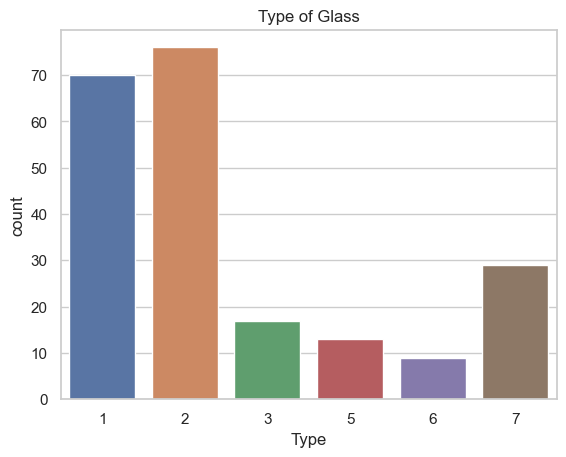

In [32]:
sns.set(style="whitegrid")
sns.countplot('Type', data=data).set_title('Type of Glass')

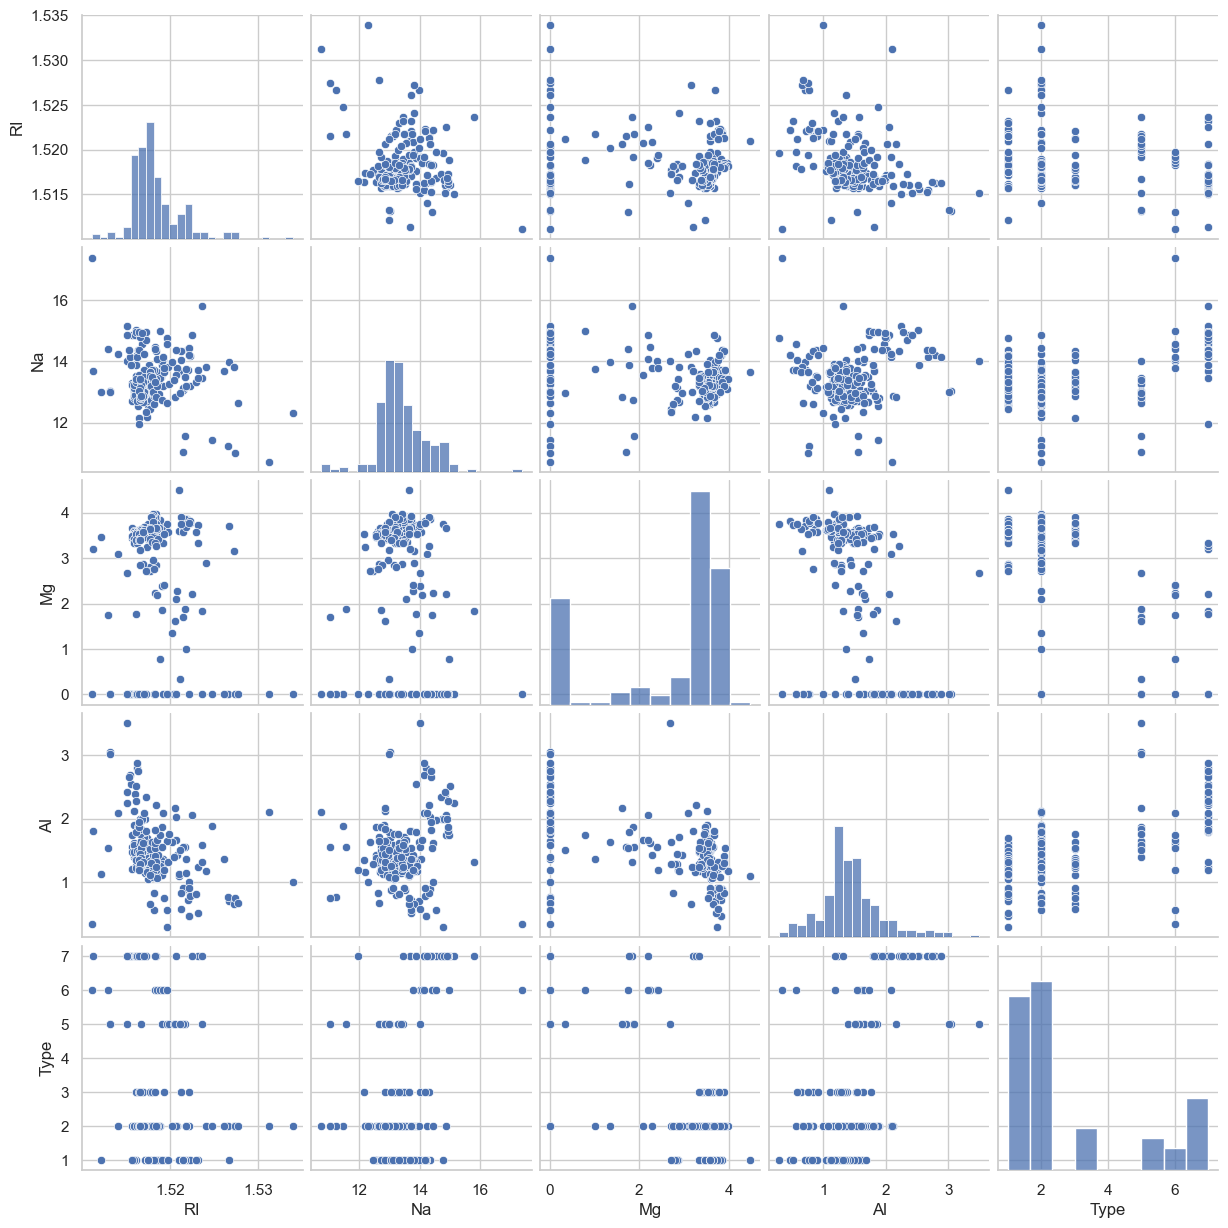

In [37]:
sns.pairplot(data, vars=['RI','Na','Mg','Al','Type'])
plt.show()

In [34]:
X = data.drop(columns='Type', axis =1)
y= data['Type']

In [11]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [12]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [14]:
x_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
213,1.51711,14.23,0.00,2.08,73.36,0.00,8.62,1.67,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
164,1.51915,12.73,1.85,1.86,72.69,0.60,10.09,0.00,0.0
14,1.51763,12.61,3.59,1.31,73.29,0.58,8.50,0.00,0.0
...,...,...,...,...,...,...,...,...,...
43,1.52210,13.73,3.84,0.72,71.76,0.17,9.74,0.00,0.0
22,1.51736,12.78,3.62,1.29,72.79,0.59,8.70,0.00,0.0
72,1.51593,13.09,3.59,1.52,73.10,0.67,7.83,0.00,0.0
15,1.51761,12.81,3.54,1.23,73.24,0.58,8.39,0.00,0.0


In [15]:
x_test

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
23,1.51751,12.81,3.57,1.35,73.02,0.62,8.59,0.00,0.00
155,1.51646,13.04,3.40,1.26,73.01,0.52,8.58,0.00,0.00
207,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.00
13,1.51748,12.86,3.56,1.27,73.21,0.54,8.38,0.00,0.17
64,1.52172,13.48,3.74,0.90,72.01,0.18,9.61,0.00,0.07
131,1.52614,13.70,0.00,1.36,71.24,0.19,13.44,0.00,0.10
141,1.51851,13.20,3.63,1.07,72.83,0.57,8.41,0.09,0.17
193,1.51719,14.75,0.00,2.00,73.02,0.00,8.53,1.59,0.08
93,1.51590,13.24,3.34,1.47,73.10,0.39,8.22,0.00,0.00
30,1.51768,12.65,3.56,1.30,73.08,0.61,8.69,0.00,0.14


In [16]:
model= DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [17]:
y_pred = model.predict(x_test)
sc = metrics.accuracy_score(y_pred,y_test)

In [18]:
sc

0.6046511627906976

In [19]:
Rf = RandomForestClassifier()
Rf.fit(x_train, y_train)

RandomForestClassifier()

In [20]:
y_pred = Rf.predict(x_test)
score = metrics.accuracy_score(y_pred,y_test)

In [21]:
score

0.813953488372093

In [22]:
print('score of Decision Tree: ',sc,'\n score of Fandon forest: ',score)

score of Decision Tree:  0.6046511627906976 
 score of Fandon forest:  0.813953488372093
